In [14]:
import torch
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from final_model_log_scale import WAE, AudioDataset

In [38]:
torch.nn.Module.dump_patches = False

model,log = torch.load("../pretrained/uku_guitare_3700_e.pt", map_location="cpu")
model.eval()

motu_dataset = AudioDataset("/home/antoine/Musique/enregistrement_cordes/export/motu_dataset/*.wav", slice_size=128, process=0)
motu = DataLoader(motu_dataset, shuffle=False, batch_size=400, drop_last=False)
print("Done!")

Done!


/home/antoine/lap/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'final_model_log_scale.WAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [71]:
data = next(iter(motu))

In [114]:
z = model.encode(data[0])

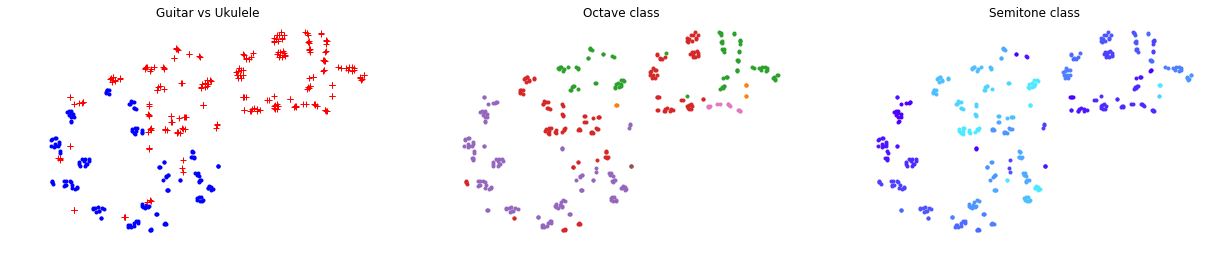

In [117]:
z_ = torch.cat([z,data[1], data[2]], 1).detach().cpu().numpy()
z_emb = TSNE(n_components=2).fit_transform(z_)

plt.figure(figsize=(21,4))
plt.subplot(131)

for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], "r+" if "guitare" in motu_dataset.liste[i] else "b.")

plt.axis("off")
plt.title("Guitar vs Ukulele")
plt.subplot(132)


for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], "C{}.".format(np.argmin(abs(data[1][i].detach().cpu().numpy()-1))))

plt.axis("off")
plt.title("Octave class")
plt.subplot(133)


for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], '.', color=(.3,np.argmin(abs(data[2][i].detach().cpu().numpy()-1))/12., 1))

plt.axis("off")
plt.title("Semitone class")

plt.savefig("tsne_latent_space_guitare_uku.eps")
plt.show()

In [81]:
import numpy as np
x = np.array([1,2,3])
np.argmin(abs(x-2))

1

In [96]:
np.argmin(abs(data[1][i].detach().cpu().numpy()-1))

IndexError: list index out of range

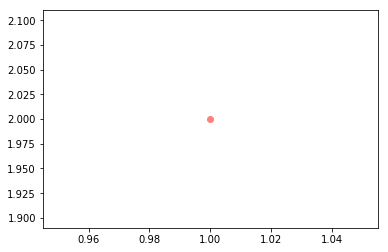

In [105]:
plt.plot(1,2, 'o', color=(1,.5,.5))

In [113]:
data

[tensor([[[-1.0000, -1.0000, -1.0000,  ..., -0.8898, -0.8864, -0.8964],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8283, -0.8233, -0.8383],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8314, -0.8373, -0.8936],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ..., -0.9725, -0.9750, -0.9586],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9555, -0.9595, -0.9335],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8993, -0.9455, -0.8959],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ..., -0.9167, -0.9311, -0.9505],
          [-1.0000, -1.0000,